## STEP_1 IMPORTING LIBRARIES


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP_2 IMPORTING OR CREATING DATAFRAME

In [9]:
data=pd.read_csv("https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/refs/heads/main/Zomato_Python_Project/Zomato%20data%20.csv")
#here we have idrectly imported from github by  url
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [10]:
data.sample(7)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
114,Cake Bite,No,No,3.4/5,0,300,Dining
109,Katriguppe Donne Biryani,No,No,3.2/5,4,300,Dining
12,The Coffee Shack,Yes,Yes,4.2/5,164,500,Cafes
85,The Big O Bakes,No,No,4.0/5,66,300,Dining
77,Devanna Dum Biriyani Centre,Yes,No,3.6/5,28,300,Dining
62,Chinese Kitchen,Yes,No,3.8/5,58,150,Dining
41,Havyaka Mess,No,No,3.9/5,28,300,Dining


## CONVERTING THE DATATYPE OF COLUMNS-RATE

In [12]:
def handlerate(value):
    value=str(value).split("/")
    value=value[0];
    return float(value)
data["rate"]=data["rate"].apply(handlerate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [17]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [19]:
data.isnull().sum()
#hence not a single col have missing value

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Q_1. WHAT TYPE OF RESTRAUNT DO THE MAJORITY OF CUSTOMER ORDER FROM?

In [22]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\alamu\AppData\Local\Temp\ipykernel_5660\1318050323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="listed_in(type)",data=data,palette=custom_colors)


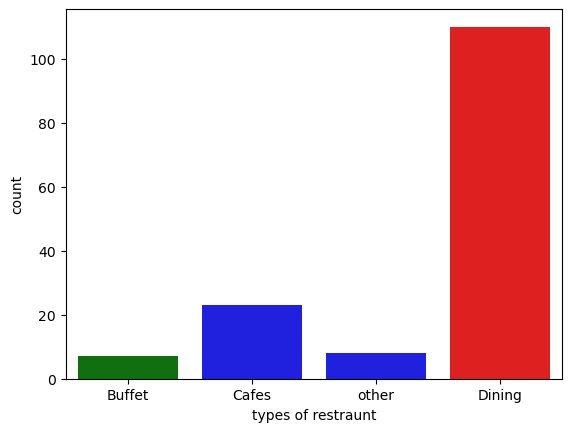

In [28]:
custom_colors = ['g', 'b', 'b', 'r']
sns.countplot(x="listed_in(type)",data=data,palette=custom_colors)
plt.xlabel("types of restraunt")
plt.show()

### Q_2 HOW MANY VOTES HAS EACH TYPE OF RESTRAUNT HAS RECEIVED FROM CUSTOMER?

In [15]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [35]:
gb=data.groupby("listed_in(type)")["votes"].sum()
gb

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

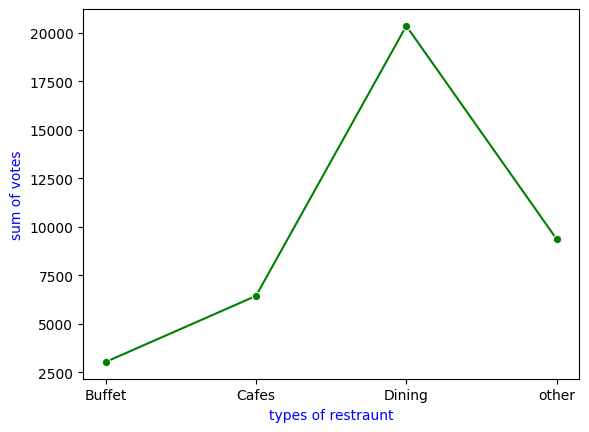

In [41]:
sns.lineplot(gb,color="g",marker="o")
plt.xlabel("types of restraunt",color="b")
plt.ylabel("sum of votes",color="b")
plt.show()

### WHAT ARE THE RATING THAT MAJORITY OF RESTRAUNTS HAVE RECEIVED?

In [30]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='rate', ylabel='Count'>

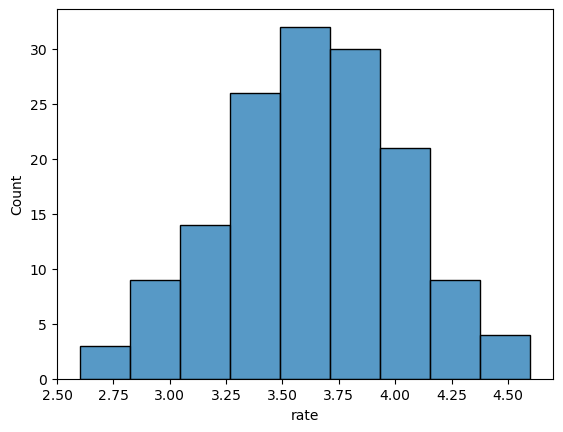

In [34]:
sns.histplot(data["rate"])

<Axes: xlabel='rate', ylabel='count'>

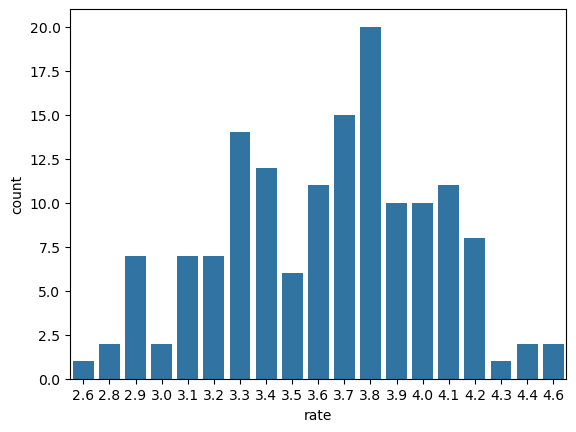

In [38]:
sns.countplot(x=data["rate"])

### ZOMATO HAS OBSERVED THAT MOST OF THE COUPLES ORDER MOST OF THEIR FOOD ONLINE. WHAT IS THEIR AVH SPENDING ON EACH ORDER

In [41]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [53]:
gbb=data.groupby("online_order")["approx_cost(for two people)"].mean()
gbb

online_order
No     358.888889
Yes    510.344828
Name: approx_cost(for two people), dtype: float64

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

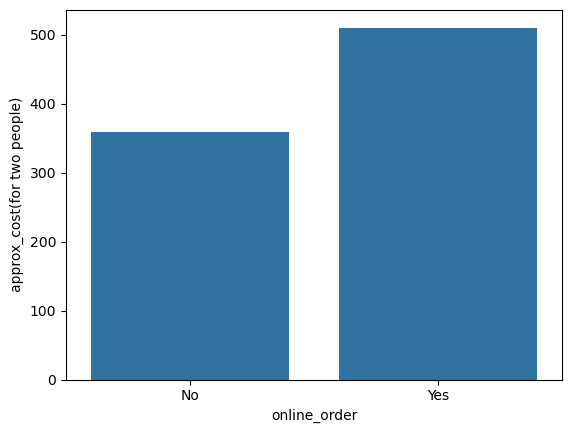

In [55]:
sns.barplot(gbb)

In [ ]:
CON: IT STATES THAT THE PEOPLE ORDERING ONLINE SPENT MORE AS COMPARE TO OFFLINE PPL.

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

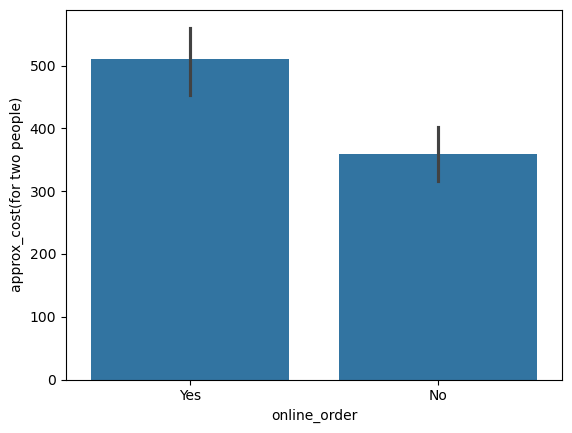

In [59]:
sns.barplot(x="online_order",y="approx_cost(for two people)",data=data)
#alternate way

### WHICH ONLINE OR OFFLINE MODE HAS RECEIVED THE MAXIMUM RATING?

In [63]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

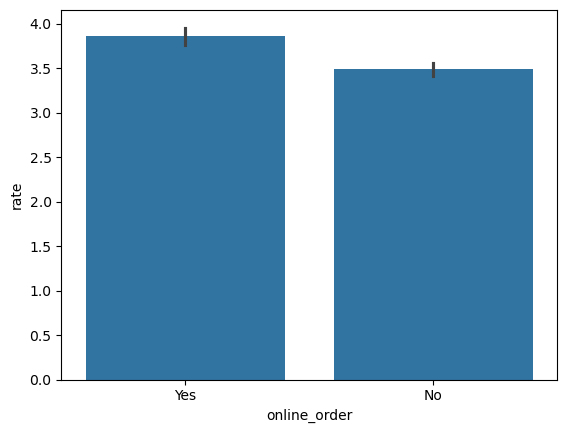

In [97]:
sns.barplot(x="online_order",y="rate",data=data)

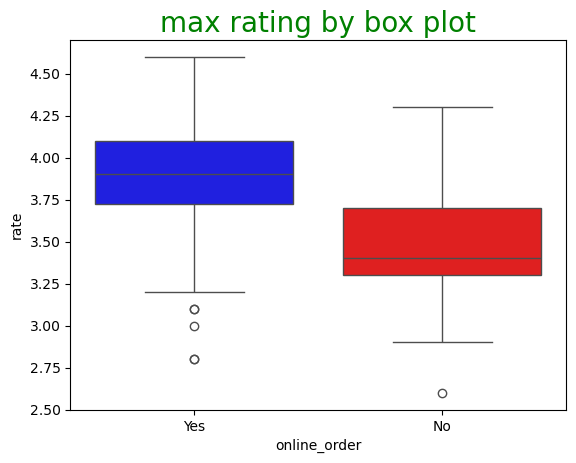

In [111]:
sns.boxplot(x="online_order",y="rate",data=data,palette={"Yes":"blue","No":"red"},hue="online_order")
plt.title("max rating by box plot",c="g",size=20)
plt.show()
#alternate way

In [ ]:
CON: OFFLINE ORDERS RECEIVED LOWER RATING AS COMPARED TO ONLINE RATING

### WHICH TYPE OF RESTRAUNT RECEIVE MORE OFFLINE ORDERS, SO THAAT ZOMATO CAN P CUSTOMERS WITH SOME GOOD OFFERS

In [115]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [129]:
ct=pd.crosstab(data["listed_in(type)"],data["online_order"])
ct

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

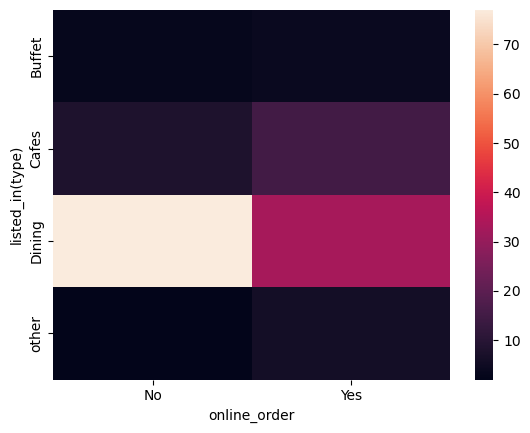

In [131]:
sns.heatmap(ct)

In [ ]:
CON: DINNING RESTRAINTS PRIMARILY ACCEPT OFFLINE ORDERS, WHEREAS CAFES PRIMARILY RECEIVES ONLINE ORDERS.